This notebook is inspired but not limited by *Machine Learning In Action*.

All rights deserved by Diane(Qingyun Hu).

# 1. About kNN

## 1.1 Mechanism of kNN
kNN is a kind of supervised learning. It has no training process. The main idea is to classify an entry by taking the majority vote of it's closest k examples(labeled traning data).
Given a piece of unlabelled data called unknown_x, classify it's class by:
1. Calculate it's distance to all existing labeled data.
3. Find k examples that unknown_x is closest to from the existing labeled data. (For instance, sort by distance then take the first k examples).
3. Take the majority vote of the k examples' class as unknown_x's class.

## 1.2 Pros and Cons
### 1.21 Pros
1. Insensitive to anomalies.
2. High accuracy. 

### 1.22 Pros
1. Computationally expensive. To classify one piece of data, it's distance to each known labeled entry has to be calculated.
2. Requires large memory. O(N*M) where N stands for the number of labeled datasets, M stands for the number of unlabeled datasets to be classified.

# 2. Build kNN Classifier Step by Step

In [1]:
# Creat demo dataset

from numpy import *
def creatData1():
    X = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    y = ['A','A','B','B']
    return X, y

X, y = creatData1()

[Text(1.01,1.11,'A'),
 Text(1.01,1.01,'A'),
 Text(0.01,0.01,'B'),
 Text(0.01,0.11,'B')]

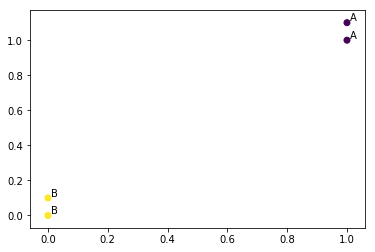

In [2]:
# [Optional] Visualize the demo dataset

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0],X[:,1],c=list(map(ord, y)))
list(map(plt.text,X[:,0]+0.01,X[:,1]+0.01,y))

In [3]:
# kNN classifier

from collections import defaultdict
def kNN_classifier(X, y, new_x, k):
    # Calculate distances
    diffMat = new_x - X
    sqDiffMat = diffMat ** 2
    distances = (sqDiffMat.sum(1)) ** 0.5
    # Classification
    kClasses = defaultdict(int)
    sortedDistInd = distances.argsort()
    for i in sortedDistInd[0:k]:
        kClasses[y[i]]
    return sorted(kClasses.items(), key=lambda x: x[1], reverse=True)[0][0]

In [4]:
# test case

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# test case: 1
kNN_classifier(X, y, [0,0], 4)
# test case: 2
kNN_classifier(X, y, [0,0], 5)
# test case: 3
kNN_classifier(X, y, [1,4], 3)

'A'

# 2. Real World Test Case - Digits Recognition

In [5]:
# Data Exploration

from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
digits.target.shape
digits.data[0]    # Each Feature has the same range in this specific problem. That means normalization is not a must when dataset is large enough. Therefore, let's just skip it.
digits.target[0]

(1797, 64)

(1797,)

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

0

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.8)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
# Performance Meaturement

from sklearn.metrics import accuracy_score
y_pred = array([kNN_classifier(X=X_train, y=y_train, new_x=i, k=20) for i in X_test])
print("ACC without Normalization: %f" % accuracy_score(y_true=y_test, y_pred=y_pred))

ACC without Normalization: 0.986111


 # 3. Misc.

 ## 3.1 See if Normalization make any difference

In [8]:
# See if Normalization make any difference

from sklearn.preprocessing import MinMaxScaler
y_pred = array([kNN_classifier(X=MinMaxScaler().fit_transform(X_train), y=y_train, new_x=i, k=20) for i in MinMaxScaler().fit_transform(X_test)])
print("ACC with Normalization: %f" % accuracy_score(y_true=y_test, y_pred=y_pred))

ACC with Normalization: 0.986111


#### Same!!!

 ## 3.2 Implement with sklearn.neighbors.KNeighborsClassifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, y_train)
# classifier.predict(X_test)
print("ACC with Normalization with sklearn: %f" % classifier.score(X_test,y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

ACC with Normalization with sklearn: 0.958333
